In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Bank Account Fraud.csv')
print(df.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ..

In [3]:
import numpy as np

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
df.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.040000e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565400  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

In [ ]:
# Replacing null values with NaN

In [6]:
df['velocity_6h'] = df['velocity_6h'].apply(lambda x : x if x > 0 else 0)

In [7]:
df['prev_address_months_count'] = df['prev_address_months_count'].apply(lambda x : x if x > 0 else np.NaN)

In [8]:
df['current_address_months_count'] = df['current_address_months_count'].apply(lambda x : x if x > 0 else np.NaN)

In [9]:
df['intended_balcon_amount'] = df['intended_balcon_amount'].apply(lambda x : x if x > 0 else np.NaN)

In [10]:
df['bank_months_count'] = df['bank_months_count'].apply(lambda x : x if x > 0 else np.NaN)

In [11]:
df['session_length_in_minutes'] = df['session_length_in_minutes'].apply(lambda x : x if x > 0 else np.NaN)

In [12]:
df.isnull()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0            False   False                  False                       True   
1            False   False                  False                       True   
2            False   False                  False                      False   
3            False   False                  False                      False   
4            False   False                  False                       True   
...            ...     ...                    ...                        ...   
999995       False   False                  False                       True   
999996       False   False                  False                       True   
999997       False   False                  False                       True   
999998       False   False                  False                      False   
999999       False   False                  False                       True   

        current_address_months_count  customer_age  days_since_request  \
0                              False         False               False   
1                              False         False               False   
2                              False         False               False   
3                              False         False               False   
4                              False         False               False   
...                              ...           ...                 ...   
999995                         False         False               False   
999996                         False         False               False   
999997                         False         False               False   
999998                         False         False               False   
999999                         False         False               False   

        intended_balcon_amount  payment_type  zip_count_4w  ...  \
0                        False         False         False  ...   
1                         True         False         False  ...   
2                         True         False         False  ...   
3                         True         False         False  ...   
4                        False         False         False  ...   
...                        ...           ...           ...  ...   
999995                    True         False         False  ...   
999996                   False         False         False  ...   
999997                   False         False         False  ...   
999998                    True         False         False  ...   
999999                   False         False         False  ...   

        has_other_cards  proposed_credit_limit  foreign_request  source  \
0                 False                  False            False   False   
1                 False                  False            False   False   
2                 False                  False            False   False   
3                 False                  False            False   False   
4                 False                  False            False   False   
...                 ...                    ...              ...     ...   
999995            False                  False            False   False   
999996            False                  False            False   False   
999997            False                  False            False   False   
999998            False                  False            False   False   
999999            False                  False            False   False   

        session_length_in_minutes  device_os  keep_alive_session  \
0                           False      False               False   
1                           False      False               False   
2                           False      False               False   
3                           False      False               False   
4                           False      False               False   
...                           ...        ...

In [ ]:
# Handling the NaN values by replacing them with the mean value of that particular column

In [13]:
mean_prev_address_months_count = np.mean(df['prev_address_months_count'])
df['prev_address_months_count'] = df['prev_address_months_count'].apply(lambda x: x if x > 0 else mean_prev_address_months_count)

In [14]:
mean_current_address_months_count = np.mean(df['current_address_months_count'])
df['current_address_months_count'] = df['current_address_months_count'].apply(lambda x: x if x > 0 else mean_current_address_months_count)

In [15]:
mean_intended_balcon_amount = np.mean(df['intended_balcon_amount'])
df['intended_balcon_amount'] = df['intended_balcon_amount'].apply(lambda x: x if x > 0 else mean_intended_balcon_amount)

In [16]:
mean_bank_months_count = np.mean(df['bank_months_count'])
df['bank_months_count'] = df['bank_months_count'].apply(lambda x: x if x > 0 else mean_bank_months_count)

In [17]:
mean_session_length_in_minutes = np.mean(df['session_length_in_minutes'])
df['session_length_in_minutes'] = df['session_length_in_minutes'].apply(lambda x: x if x > 0 else mean_session_length_in_minutes)

In [18]:
df1 = df[df.isna().any(axis=1)]
print(df1.head())
# To verify no NaN values exist in the dataframe

Empty DataFrame
Columns: [fraud_bool, income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount, payment_type, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, employment_status, credit_risk_score, email_is_free, housing_status, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit, foreign_request, source, session_length_in_minutes, device_os, keep_alive_session, device_distinct_emails_8w, device_fraud_count, month]
Index: []

[0 rows x 32 columns]


In [19]:
count = df.isnull().sum(axis=1)
print(count)
# To verify there are a total of 0 null values for each row

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Length: 1000000, dtype: int64


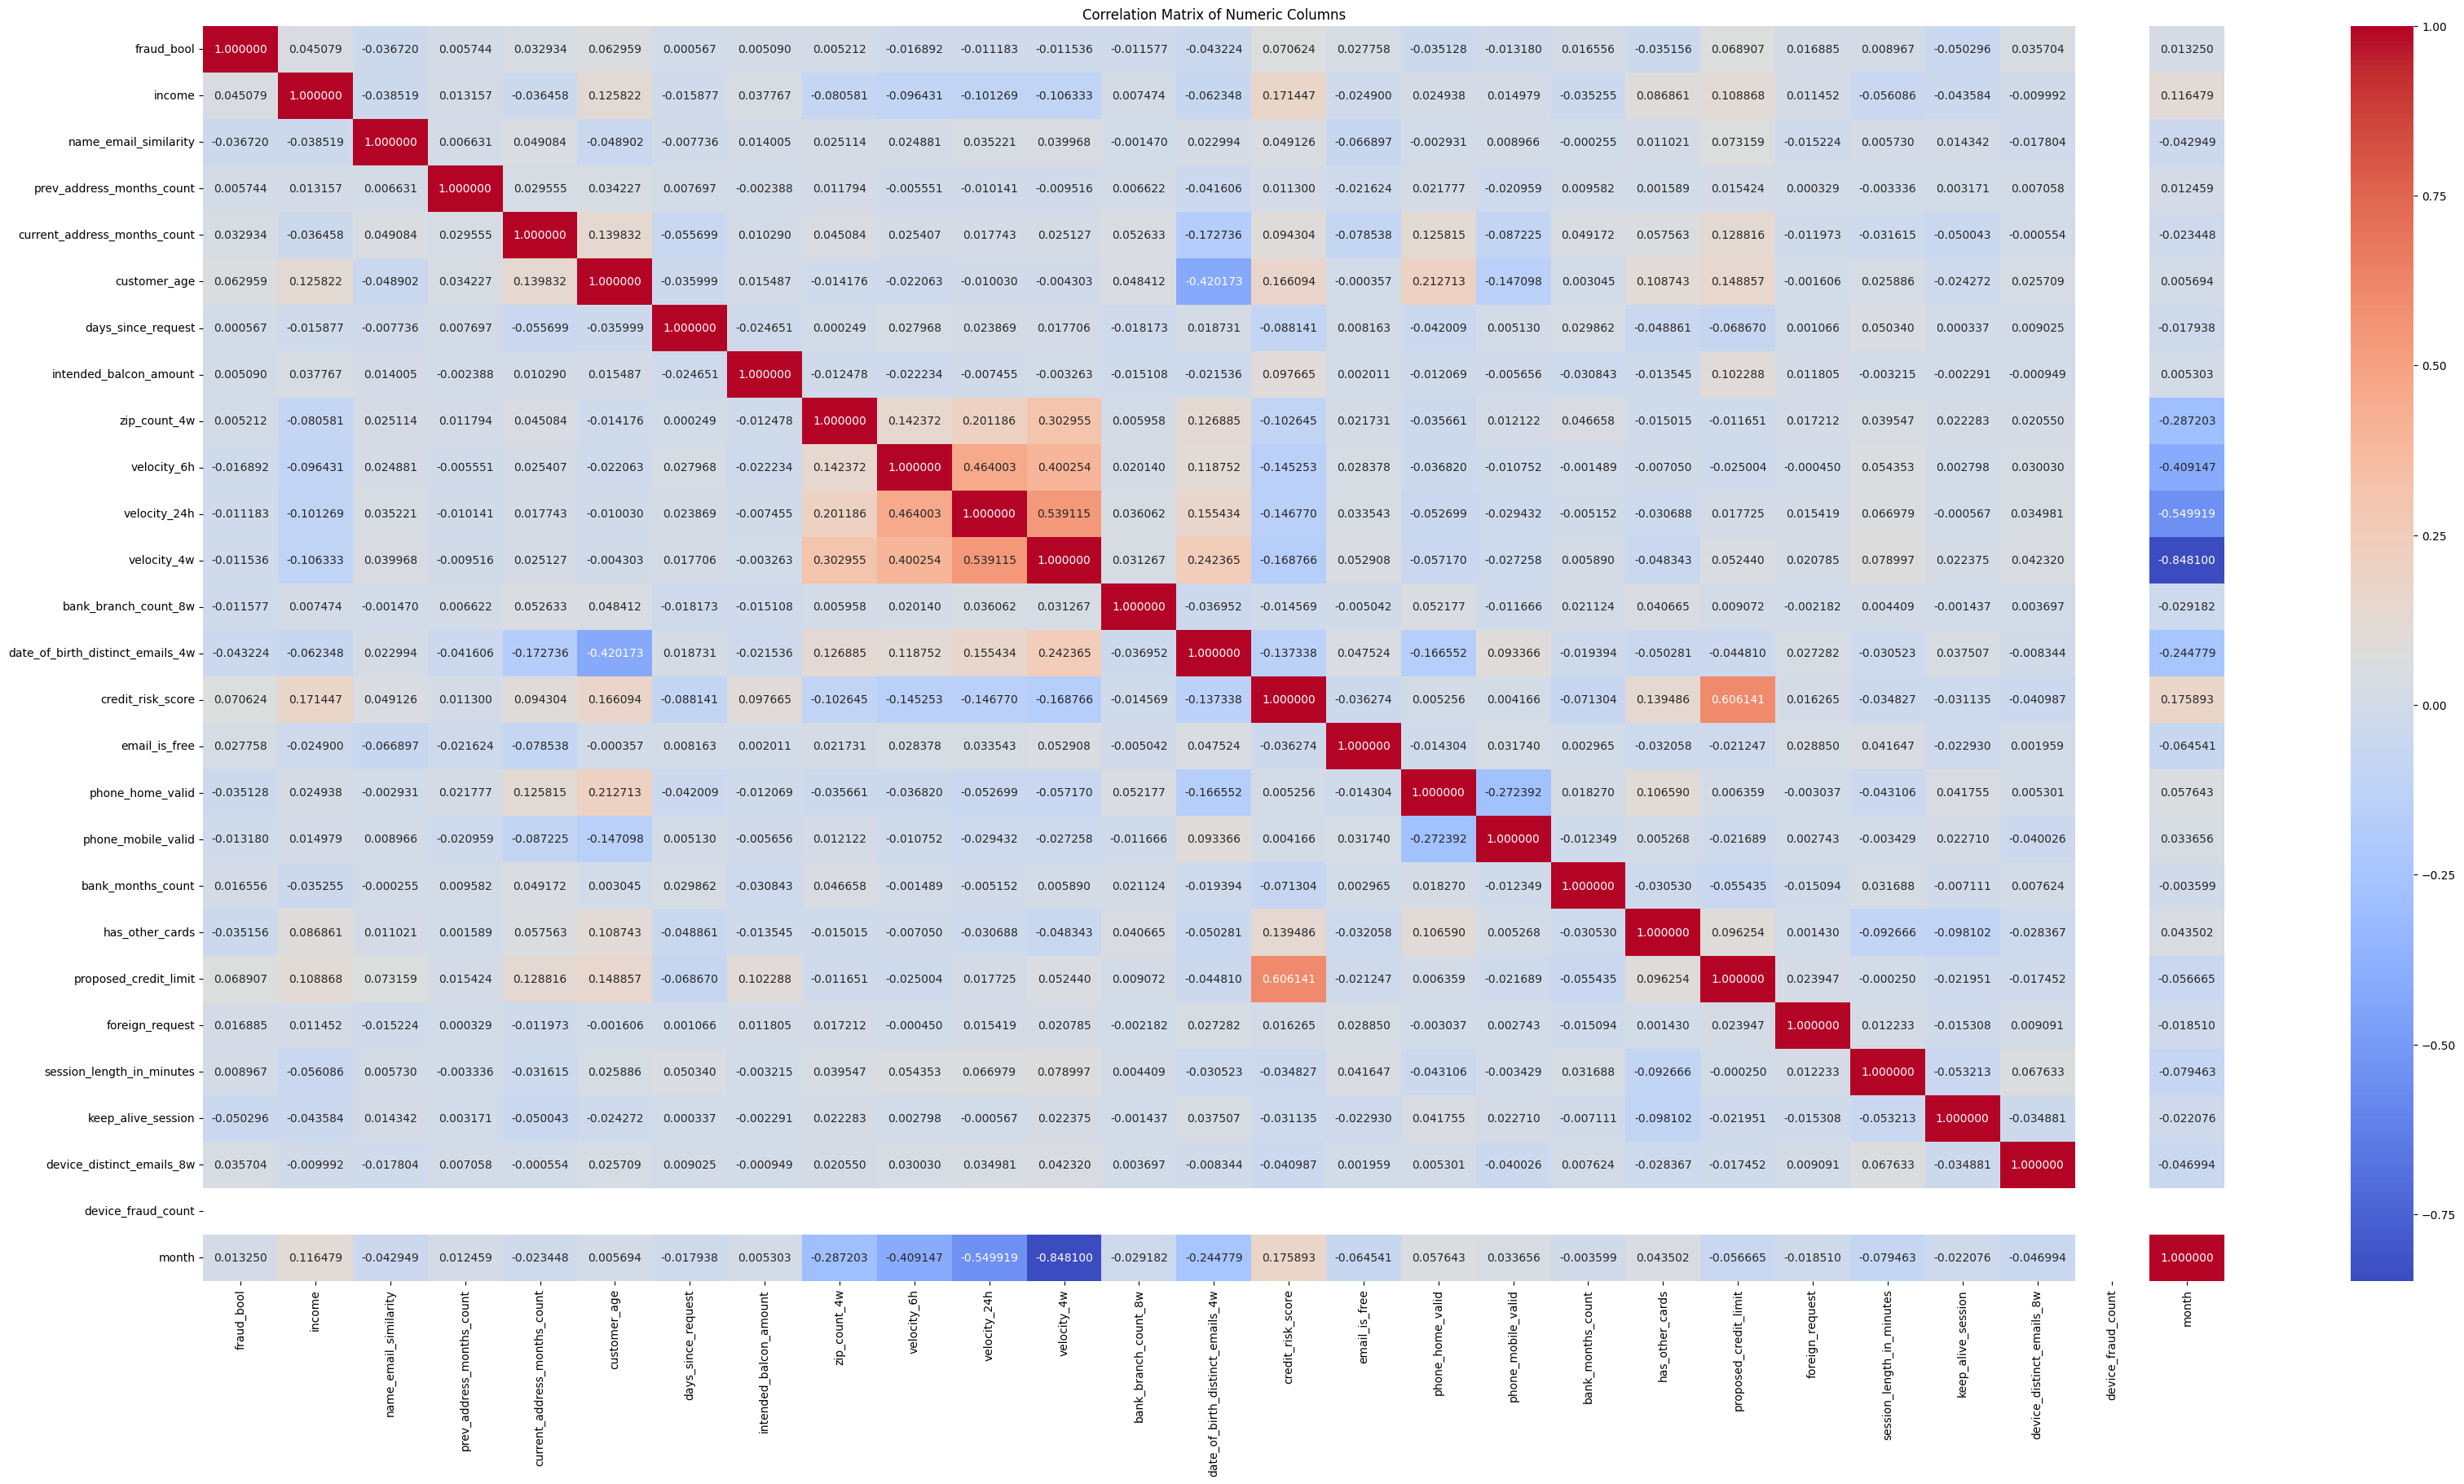

In [20]:
import matplotlib.pyplot as plt
import seaborn as sm
# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(40,20))
sm.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [22]:
#Convert categorical datatype to binary by LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df['device_os'])
print(encoded)

[0 2 3 ... 2 0 2]


In [23]:
# removing the original column 'device_os' from df
df.drop('device_os', axis=1, inplace=True)
# adding it back
df['device_os'] = encoded
df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...                0   
1               36.582496           AD          1658  ...                0   
2               36.582496           AB          1095  ...                0   
3               36.582496           AB          3483  ...                0   
4               47.152498           AA          2339  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                   1500                0  INTERNET   
1                   1500                0  INTERNET   
2                    200                0  INTERNET   
3                    200                0  INTERNET   
4                    200                0  INTERNET   

   session_length_in_minutes keep_alive_session  device_distinct_emails_8w  \
0                  16.224843                  1                          1   
1                   3.363854                  1                          1   
2                  22.730559                  0                          1   
3                  15.215816                  1                          1   
4                   3.743048                  0                          1   

   device_fraud_count month  device_os  
0                   0     0          0  
1                   0     0          2  
2                   0     0          3  
3                   0     0          0  
4                   0     0          2  

[5 rows x 32 columns]

In [24]:
encoded1 = le.fit_transform(df['payment_type'])
print(encoded1)
df.drop('payment_type', axis=1, inplace=True)
df['payment_type'] = encoded
df.head()

[0 3 1 ... 0 1 0]


fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  \
0              102.453711          1059  13096.035020  ...   
1               36.582496          1658   9223.283431  ...   
2               36.582496          1095   4471.472149  ...   
3               36.582496          3483  14431.993620  ...   
4               47.152498          2339   7601.511579  ...   

   proposed_credit_limit  foreign_request    source  \
0                   1500                0  INTERNET   
1                   1500                0  INTERNET   
2                    200                0  INTERNET   
3                    200                0  INTERNET   
4                    200                0  INTERNET   

   session_length_in_minutes keep_alive_session  device_distinct_emails_8w  \
0                  16.224843                  1                          1   
1                   3.363854                  1                          1   
2                  22.730559                  0                          1   
3                  15.215816                  1                          1   
4                   3.743048                  0                          1   

   device_fraud_count month  device_os  payment_type  
0                   0     0          0             0  
1                   0     0          2             2  
2                   0     0          3             3  
3                   0     0          0             0  
4                   0     0          2             2  

[5 rows x 32 columns]

In [25]:
encoded1 = le.fit_transform(df['payment_type'])
print(encoded1)
df.drop('payment_type', axis=1, inplace=True)
df['payment_type'] = encoded
df.head()

[0 2 3 ... 2 0 2]


fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  \
0              102.453711          1059  13096.035020  ...   
1               36.582496          1658   9223.283431  ...   
2               36.582496          1095   4471.472149  ...   
3               36.582496          3483  14431.993620  ...   
4               47.152498          2339   7601.511579  ...   

   proposed_credit_limit  foreign_request    source  \
0                   1500                0  INTERNET   
1                   1500                0  INTERNET   
2                    200                0  INTERNET   
3                    200                0  INTERNET   
4                    200                0  INTERNET   

   session_length_in_minutes keep_alive_session  device_distinct_emails_8w  \
0                  16.224843                  1                          1   
1                   3.363854                  1                          1   
2                  22.730559                  0                          1   
3                  15.215816                  1                          1   
4                   3.743048                  0                          1   

   device_fraud_count month  device_os  payment_type  
0                   0     0          0             0  
1                   0     0          2             2  
2                   0     0          3             3  
3                   0     0          0             0  
4                   0     0          2             2  

[5 rows x 32 columns]

In [26]:
encoded1 = le.fit_transform(df['employment_status'])
print(encoded1)
df.drop('employment_status', axis=1, inplace=True)
df['employment_status'] = encoded
df.head()

[1 0 0 ... 0 0 0]


fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  foreign_request  \
0              102.453711          1059  13096.035020  ...                0   
1               36.582496          1658   9223.283431  ...                0   
2               36.582496          1095   4471.472149  ...                0   
3               36.582496          3483  14431.993620  ...                0   
4               47.152498          2339   7601.511579  ...                0   

     source  session_length_in_minutes  keep_alive_session  \
0  INTERNET                  16.224843                   1   
1  INTERNET                   3.363854                   1   
2  INTERNET                  22.730559                   0   
3  INTERNET                  15.215816                   1   
4  INTERNET                   3.743048                   0   

   device_distinct_emails_8w  device_fraud_count month  device_os  \
0                          1                   0     0          0   
1                          1                   0     0          2   
2                          1                   0     0          3   
3                          1                   0     0          0   
4                          1                   0     0          2   

   payment_type  employment_status  
0             0                  0  
1             2                  2  
2             3                  3  
3             0                  0  
4             2                  2  

[5 rows x 32 columns]

In [27]:
encoded1 = le.fit_transform(df['source'])
print(encoded1)
df.drop('source', axis=1, inplace=True)
df['source'] = encoded
df.head()

[0 0 0 ... 0 0 0]


fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  foreign_request  \
0              102.453711          1059  13096.035020  ...                0   
1               36.582496          1658   9223.283431  ...                0   
2               36.582496          1095   4471.472149  ...                0   
3               36.582496          3483  14431.993620  ...                0   
4               47.152498          2339   7601.511579  ...                0   

   session_length_in_minutes  keep_alive_session  device_distinct_emails_8w  \
0                  16.224843                   1                          1   
1                   3.363854                   1                          1   
2                  22.730559                   0                          1   
3                  15.215816                   1                          1   
4                   3.743048                   0                          1   

   device_fraud_count  month device_os  payment_type  employment_status  \
0                   0      0         0             0                  0   
1                   0      0         2             2                  2   
2                   0      0         3             3                  3   
3                   0      0         0             0                  0   
4                   0      0         2             2                  2   

   source  
0       0  
1       2  
2       3  
3       0  
4       2  

[5 rows x 32 columns]

In [28]:
encoded1 = le.fit_transform(df['housing_status'])
print(encoded1)
df.drop('housing_status', axis=1, inplace=True)
df['housing_status'] = encoded
df.head()

[2 2 2 ... 4 3 1]


fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                  60.719967   
1           0     0.8               0.617426                  60.719967   
2           0     0.8               0.996707                   9.000000   
3           0     0.6               0.475100                  11.000000   
4           0     0.9               0.842307                  60.719967   

   current_address_months_count  customer_age  days_since_request  \
0                          25.0            40            0.006735   
1                          89.0            20            0.010095   
2                          14.0            40            0.012316   
3                          14.0            30            0.006991   
4                          29.0            40            5.742626   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  \
0              102.453711          1059  13096.035020  ...   
1               36.582496          1658   9223.283431  ...   
2               36.582496          1095   4471.472149  ...   
3               36.582496          3483  14431.993620  ...   
4               47.152498          2339   7601.511579  ...   

   session_length_in_minutes  keep_alive_session  device_distinct_emails_8w  \
0                  16.224843                   1                          1   
1                   3.363854                   1                          1   
2                  22.730559                   0                          1   
3                  15.215816                   1                          1   
4                   3.743048                   0                          1   

   device_fraud_count  month  device_os  payment_type  employment_status  \
0                   0      0          0             0                  0   
1                   0      0          2             2                  2   
2                   0      0          3             3                  3   
3                   0      0          0             0                  0   
4                   0      0          2             2                  2   

   source  housing_status  
0       0               0  
1       2               2  
2       3               3  
3       0               0  
4       2               2  

[5 rows x 32 columns]

In [29]:
print(df)

        fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                  60.719967   
1                0     0.8               0.617426                  60.719967   
2                0     0.8               0.996707                   9.000000   
3                0     0.6               0.475100                  11.000000   
4                0     0.9               0.842307                  60.719967   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                  60.719967   
999996           0     0.9               0.824544                  60.719967   
999997           0     0.8               0.140891                  60.719967   
999998           0     0.9               0.002480                  52.000000   
999999           0     0.6               0.993391                  60.719967   

        current_address_months_count  c

In [31]:
#upsampling again after downsampling
from sklearn.utils import resample

df_majority = df[df.fraud_bool==0]
df_minority = df[df.fraud_bool==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,         # sample without replacement
                                 n_samples=150000,      # to match minority class
                                 random_state=123)      # reproducible results

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,        # sample with replacement
                                 n_samples=150000,    # to match majority class
                                 random_state=123)    # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Display new class counts
df.fraud_bool.value_counts()

fraud_bool
0    150000
1    150000
Name: count, dtype: int64

In [32]:
df.shape

(300000, 32)

In [33]:
#Z-SCORE NORMALIZATION
def z_score_normalization(dataframe, feature_name):
    # Copy the DataFrame to avoid modifying the original DataFrame
    df_normalized = dataframe.copy()

    # Calculate mean and standard deviation of the selected feature
    mean_val = df_normalized[feature_name].mean()
    std_dev = df_normalized[feature_name].std()

    # Apply Z-score normalization to the selected feature
    df_normalized[feature_name] = (df_normalized[feature_name] - mean_val) / std_dev

    return df_normalized

# Select the feature you want to normalize
feature_to_normalize = 'credit_risk_score'

# Normalize the selected feature using Z-score normalization
df_normalized = z_score_normalization(df, 'credit_risk_score')
df_normalized = z_score_normalization(df_normalized, 'velocity_6h')
df_normalized = z_score_normalization(df_normalized, 'velocity_24h')
df_normalized = z_score_normalization(df_normalized, 'velocity_4w')
df_normalized = z_score_normalization(df_normalized, 'bank_branch_count_8w')
df_normalized = z_score_normalization(df_normalized, 'prev_address_months_count')
df_normalized = z_score_normalization(df_normalized, 'current_address_months_count')
df_normalized = z_score_normalization(df_normalized, 'intended_balcon_amount')

print("ORIGINAL DATAFRAME:\n\n")
print(df['credit_risk_score']);
print(df['velocity_6h']);
print(df['velocity_24h']);
print(df['velocity_4w']);
print(df['bank_branch_count_8w']);
print(df['prev_address_months_count']);
print(df['intended_balcon_amount']);

print("\nNORMALIZED DATAFRAME:\n\n")
print(df_normalized['credit_risk_score'])
print(df_normalized['velocity_6h']);
print(df_normalized['velocity_24h']);
print(df_normalized['velocity_4w']);
print(df_normalized['bank_branch_count_8w']);
print(df_normalized['prev_address_months_count']);
print(df_normalized['intended_balcon_amount']);

ORIGINAL DATAFRAME:


479603     40
309303    189
906129    210
153504     34
843960    288
         ... 
355050    237
5849      258
246627     95
110256    156
534149    169
Name: credit_risk_score, Length: 300000, dtype: int64
479603     3251.222941
309303     5587.261676
906129     3686.446589
153504     8950.992695
843960     3234.372333
              ...     
355050     6852.207514
5849       7701.549818
246627    11634.653690
110256     5872.720179
534149     8452.497038
Name: velocity_6h, Length: 300000, dtype: float64
479603    3574.460816
309303    4643.106419
906129    1697.384220
153504    6686.737660
843960    3377.685404
             ...     
355050    3949.772637
5849      7275.328747
246627    6737.469628
110256    6335.483765
534149    5498.197008
Name: velocity_24h, Length: 300000, dtype: float64
479603    4888.362831
309303    5123.512117
906129    3098.580386
153504    5477.044145
843960    3860.103145
             ...     
355050    5070.874520
5849      6293.96874

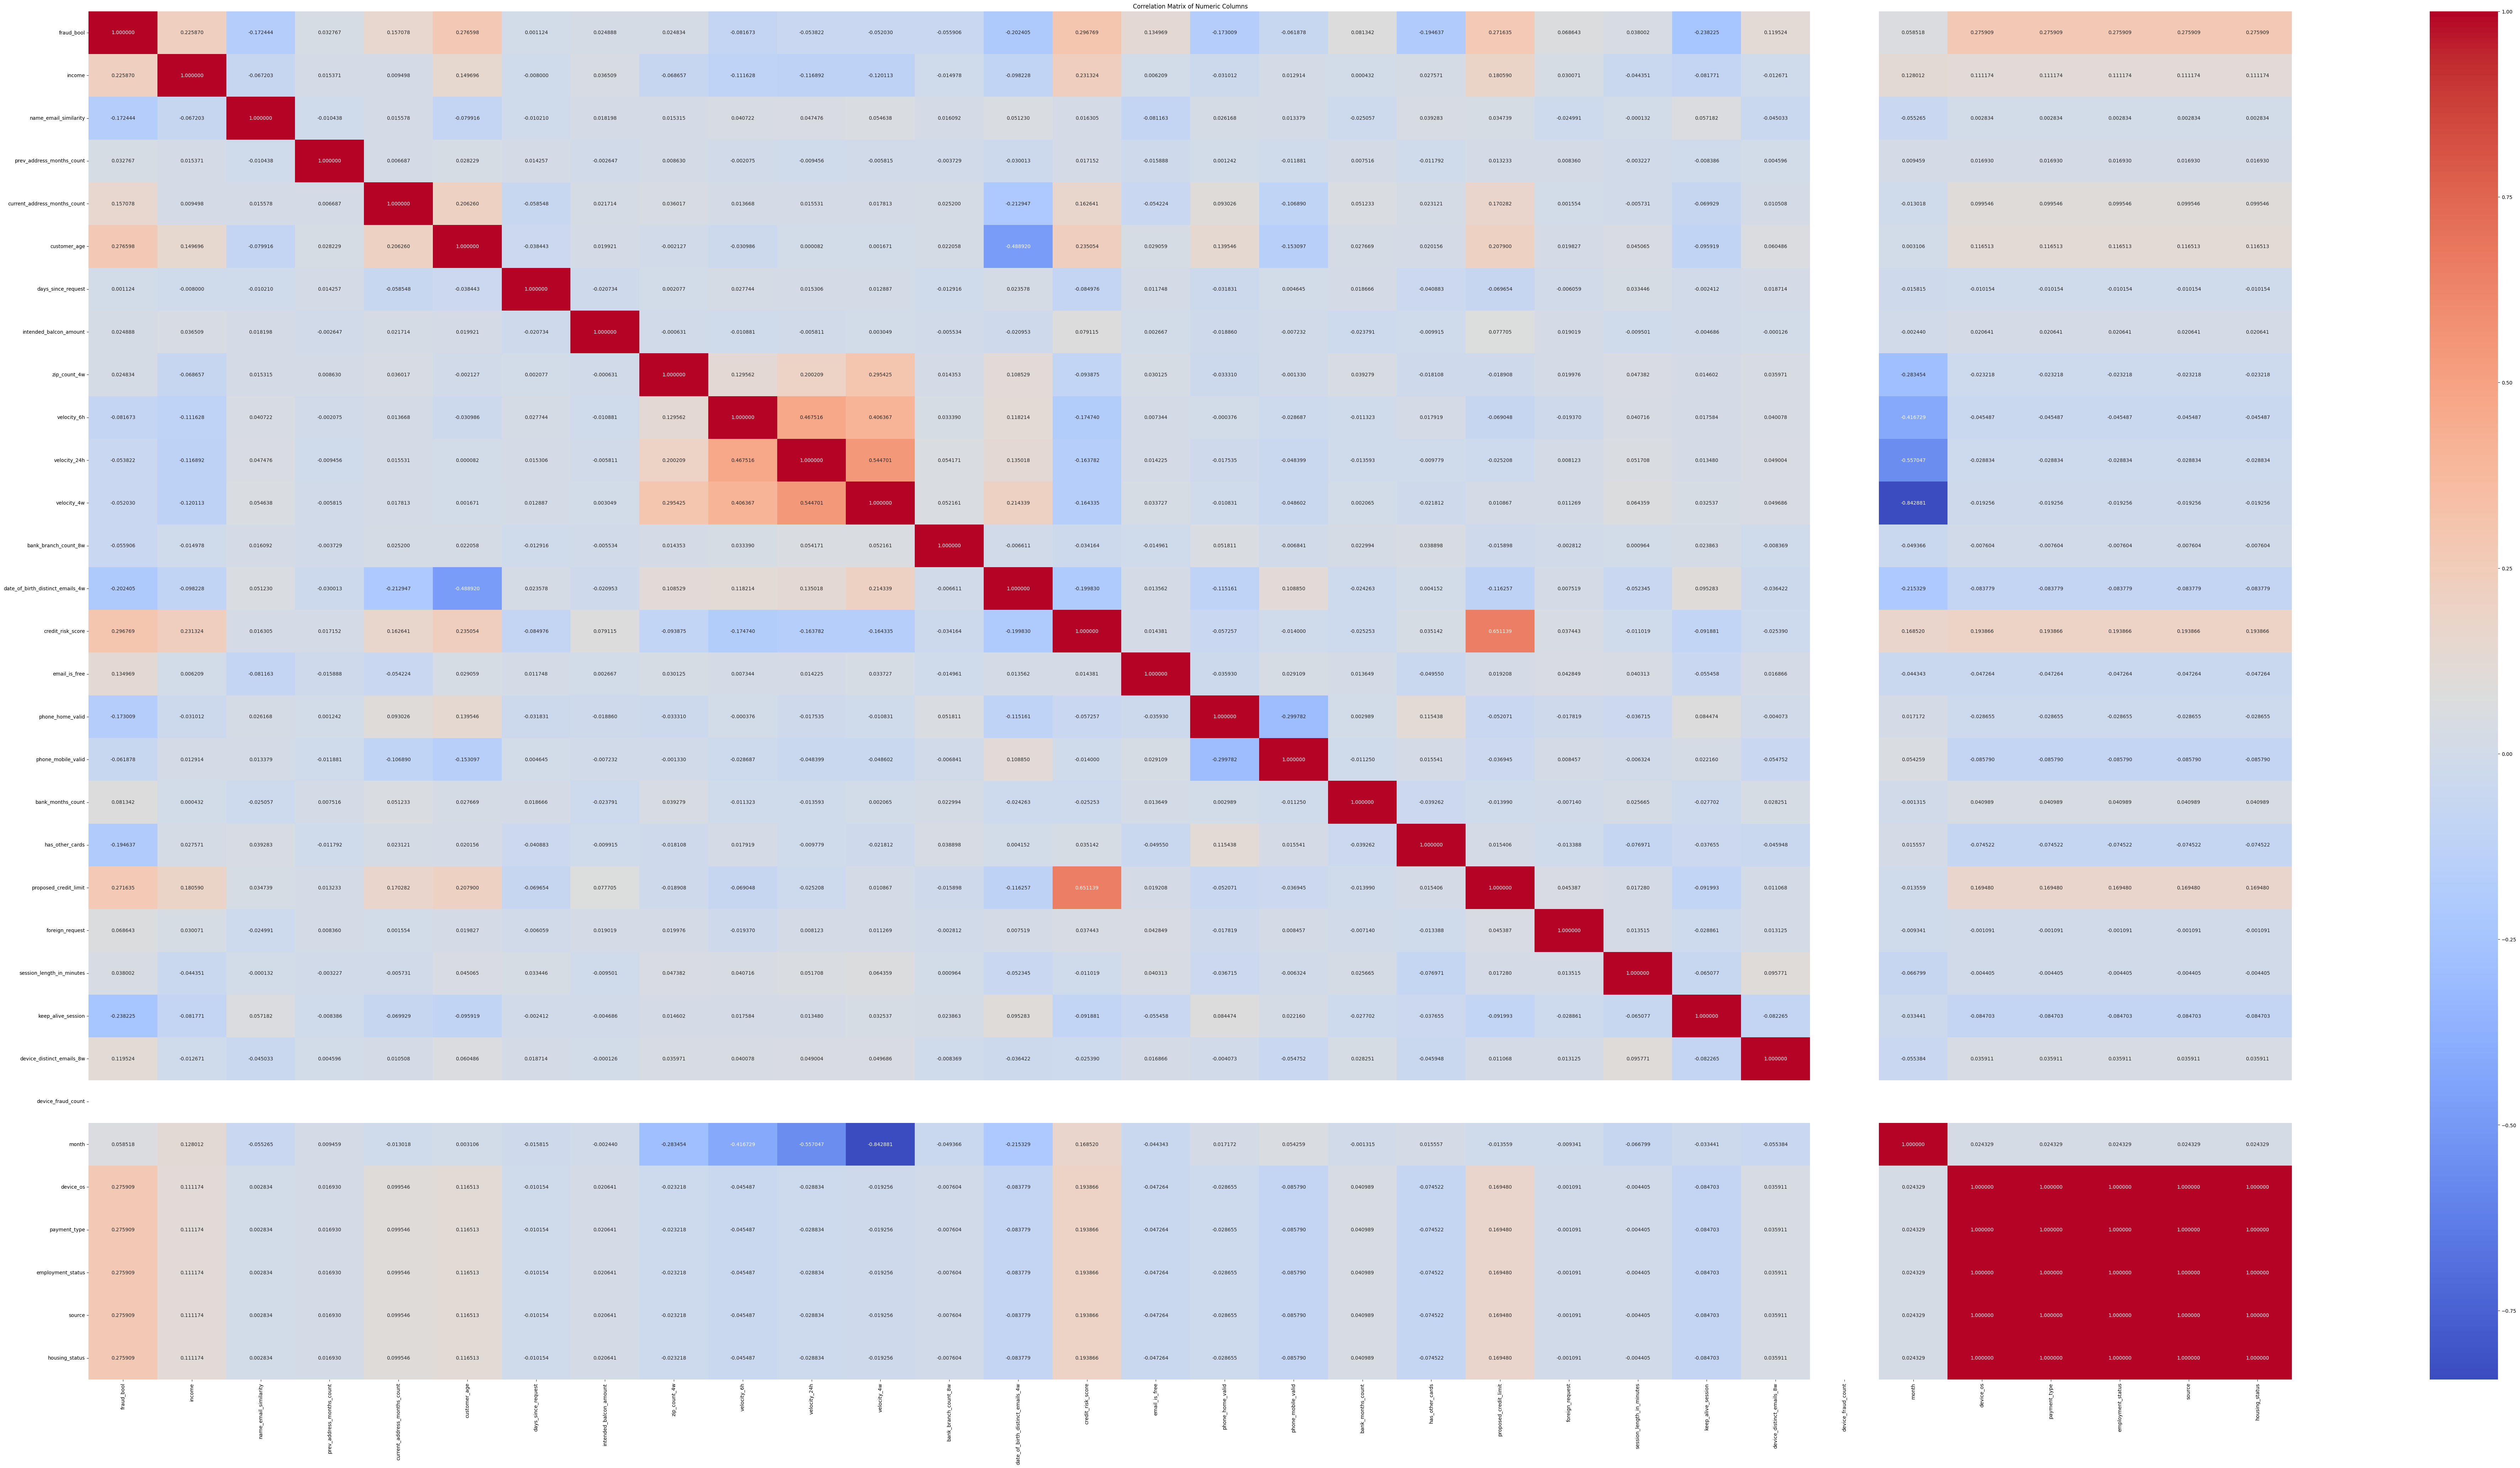

In [34]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(100,50))
sm.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [36]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

In [38]:
#random forest
# Build a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
mymodel = RandomForestClassifier()
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [39]:
# # Feature Selection
# ftrain = x_train[['income','proposed_credit_limit','credit_risk_score', 'customer_age', 'device_os', 'payment_type','employment_status','source','housing_status']]
# ftest = x_test[['income','proposed_credit_limit','credit_risk_score', 'customer_age', 'device_os', 'payment_type','employment_status','source','housing_status']]
# print(ftrain)
# print(ftest)

In [40]:

mymodel.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
# Predict the Values(Testing of model)
ypred = mymodel.predict(x_test)
print(ypred)

[0 1 1 ... 0 0 1]


In [42]:
# Evaluate the model
mymodel.score(x_test,y_test)

0.9905666666666667

In [43]:
# Evaluation of model using different metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45104
           1       0.98      1.00      0.99     44896

    accuracy                           0.99     90000
   macro avg       0.99      0.99      0.99     90000
weighted avg       0.99      0.99      0.99     90000



In [60]:
print(y_test)

        fraud_bool
890715           1
88260            1
959436           1
358938           1
788093           1
...            ...
753449           1
614922           1
676295           0
766181           0
352530           0

[90000 rows x 1 columns]


In [64]:
print(y_scores)
print(y_scores[:,0].shape)
print(y_test.shape)

[[0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 ...
 [0.91 0.09]
 [0.98 0.02]
 [0.99 0.01]]
(90000,)
(90000, 1)


In [66]:
# Area under AUC-ROC
from sklearn.metrics import roc_auc_score
y_scores = mymodel.predict_proba(x_test)
roc_auc_score(y_test,y_scores[:,1])

0.9999998046890706

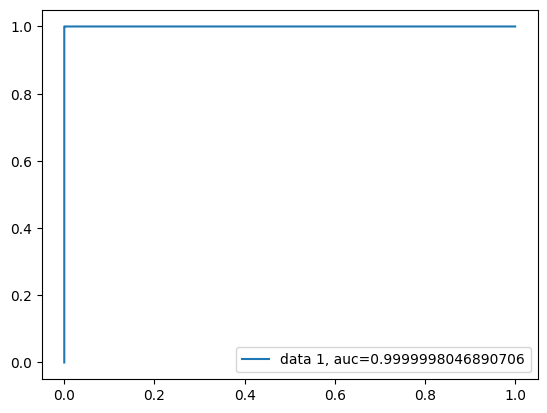

In [74]:
#plotting the AUC-ROC Graph
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_scores[:,1])
auc = metrics.roc_auc_score(y_test, y_scores[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
# import XGBoost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [45]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
# Predict the Values(Testing of model)
ypred2 = model.predict(x_test)
print(ypred2)

[1 1 1 ... 0 0 0]


In [47]:
# Evaluate the model
model.score(x_test,y_test)

0.7127666666666667

In [48]:
# Evaluation of model using different metrics
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     45154
           1       0.69      0.76      0.72     44846

    accuracy                           0.71     90000
   macro avg       0.71      0.71      0.71     90000
weighted avg       0.71      0.71      0.71     90000



In [49]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
classifier = classifier.fit(x_train,y_train)

In [50]:
ypred3 = classifier.predict(x_test)
print(ypred3)

[1 1 0 ... 0 0 1]


In [51]:
# Evaluate the model
classifier.score(x_test,y_test)


0.7029444444444445

In [52]:
# Evaluation of model using different metrics
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     45154
           1       0.71      0.69      0.70     44846

    accuracy                           0.70     90000
   macro avg       0.70      0.70      0.70     90000
weighted avg       0.70      0.70      0.70     90000

